In [13]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def LinReg(dataIn):
    t = time.time_ns()
    data=dataIn.copy()
    Xmean = np.average(data['x'])
    Ymean = np.average(data['y'])
    data['XDifferences']=data['x']-Xmean
    data['YDifferences']=data['y']-Ymean
    data['Multiplied']=data['XDifferences']*data['YDifferences']
    data['Squared']=data['XDifferences']**2
    slope = np.sum(data['Multiplied'])/np.sum(data['Squared'])
    intercept = Ymean - slope*Xmean
    print("Proper Method:")
    print("Slope is "+str(slope))
    print("Intercept is "+str(intercept))
    data['Ypreds_MSE']=data['x']*slope +intercept
    slope2 = (data['y'][len(data)-1]-data['y'][0])/(data['x'][len(data)-1]-data['x'][0])
    intercept2 = data['y'][0]-slope*data['x'][0]
    data['Ypreds_Silly']=data['x']*slope2 + intercept2
    data.drop(['XDifferences','YDifferences', 'Multiplied','Squared' ],axis=1, inplace=True)
    print("Naive Method:")
    print("Slope is "+str(slope2))
    print("Intercept is "+str(intercept2))
    print("Time is " +str(((time.time_ns()-t))/1e9))
    return data

In [14]:
d={"x":[1,2,3,4,5], "y":[4,12,28, 52,80]}
df = pd.DataFrame(data=d)

In [15]:
data=LinReg(df)#I used dataframes throughout this, for ease of use

Proper Method:
Slope is 19.2
Intercept is -22.39999999999999
Naive Method:
Slope is 19.0
Intercept is -15.2
Time is 0.009974


In [16]:
print(data)

   x   y  Ypreds_MSE  Ypreds_Silly
0  1   4        -3.2           3.8
1  2  12        16.0          22.8
2  3  28        35.2          41.8
3  4  52        54.4          60.8
4  5  80        73.6          79.8


In [17]:
t=time.time_ns()
model = LinearRegression()
model.fit(np.array(df['x']).reshape(-1,1),np.array(df['y']).reshape(-1,1))
print("Time is " +str(((time.time_ns()-t))/1e9))# WAAAAAY faster! Even with vectorization, I can't keep up with C
print("Slope is ", model.coef_)
print("Intercept is ", model.intercept_)
#The values given by both my method and the inbuilt function are essentially the same! the lines are practically indistiguishable! Only error is from floating-point calculation presicion

Time is 0.0009966
Slope is  [[19.2]]
Intercept is  [-22.4]


<function matplotlib.pyplot.show(*args, **kw)>

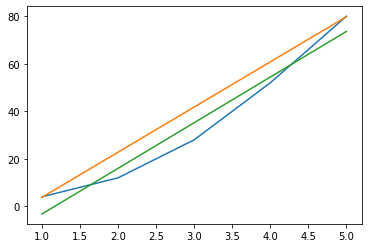

In [18]:
#Data:BLUE
plt.plot(np.array(data['x']).reshape(-1,1),np.array(data['y']).reshape(-1,1))
#Strange Method:ORANGE
plt.plot(np.array(data['x']).reshape(-1,1),np.array(data['Ypreds_Silly']).reshape(-1,1))#silly method using 1st and last points
#My MSE implementation:GREEN
plt.plot(np.array(data['x']).reshape(-1,1), np.array(data['Ypreds_MSE']).reshape(-1,1))#i'm not plotting the line from sklearn, because they would overlap. 
plt.show